In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [52]:
df= pd.read_csv('Titanic Data.csv')

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

In [55]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [56]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


        1. Show the age distribution in the data using a histogram.

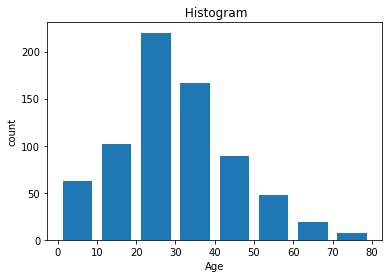

In [58]:
bins = [0,10,20,30,40,50,60,70,80]
plt.hist(df['Age'],bins,histtype='bar',rwidth=0.75)
plt.xlabel('Age')
plt.ylabel('count')
plt.title(' Histogram')
plt.show()

    2. Show the age distribution based on gender using a histogram.

<AxesSubplot:ylabel='Frequency'>

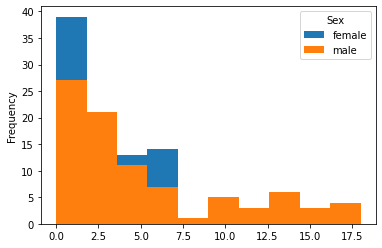

In [59]:
pd.crosstab(df['Age'],df['Sex']).plot(kind='hist')

3. Using the function df.corr() to identify the correlation within the data, represent its results
using a form of a matrix plot.

In [60]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

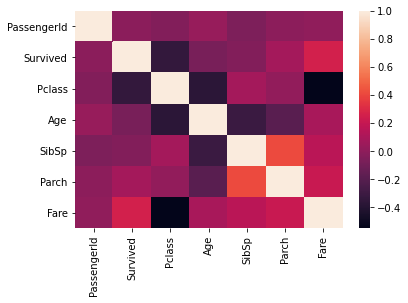

In [61]:
sns.heatmap(df.corr())

4.Pivot the data setting the column Pclass as the columns and Fare as the values. From the
resulting structure, use a boxplot to show the distribution of the values in its 3 columns.

In [62]:
df.pivot_table(values='Fare',columns='Pclass')


Pclass,1,2,3
Fare,84.154687,20.662183,13.67555


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc467fcc340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc467fcca00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc467fbdfa0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc467fd9100>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc467fd9460>,
 'means': []}

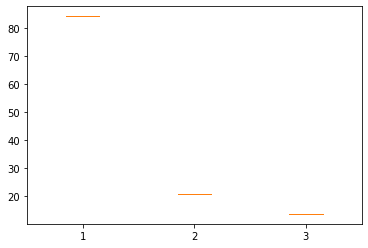

In [63]:
plt.boxplot(df.pivot_table(values='Fare',columns='Pclass'))

5. Graph the value counts of the number of passengers who survived and did not survive
based on gender using a stacked bar graph.

<AxesSubplot:xlabel='Survived'>

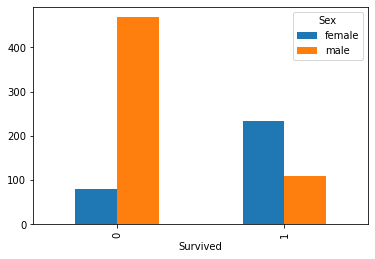

In [64]:
pd.crosstab(df['Survived'],df['Sex']).plot(kind='bar')

6. Using a scatter plot, plot the ages to the fare paid by the each passenger based on their
gender.

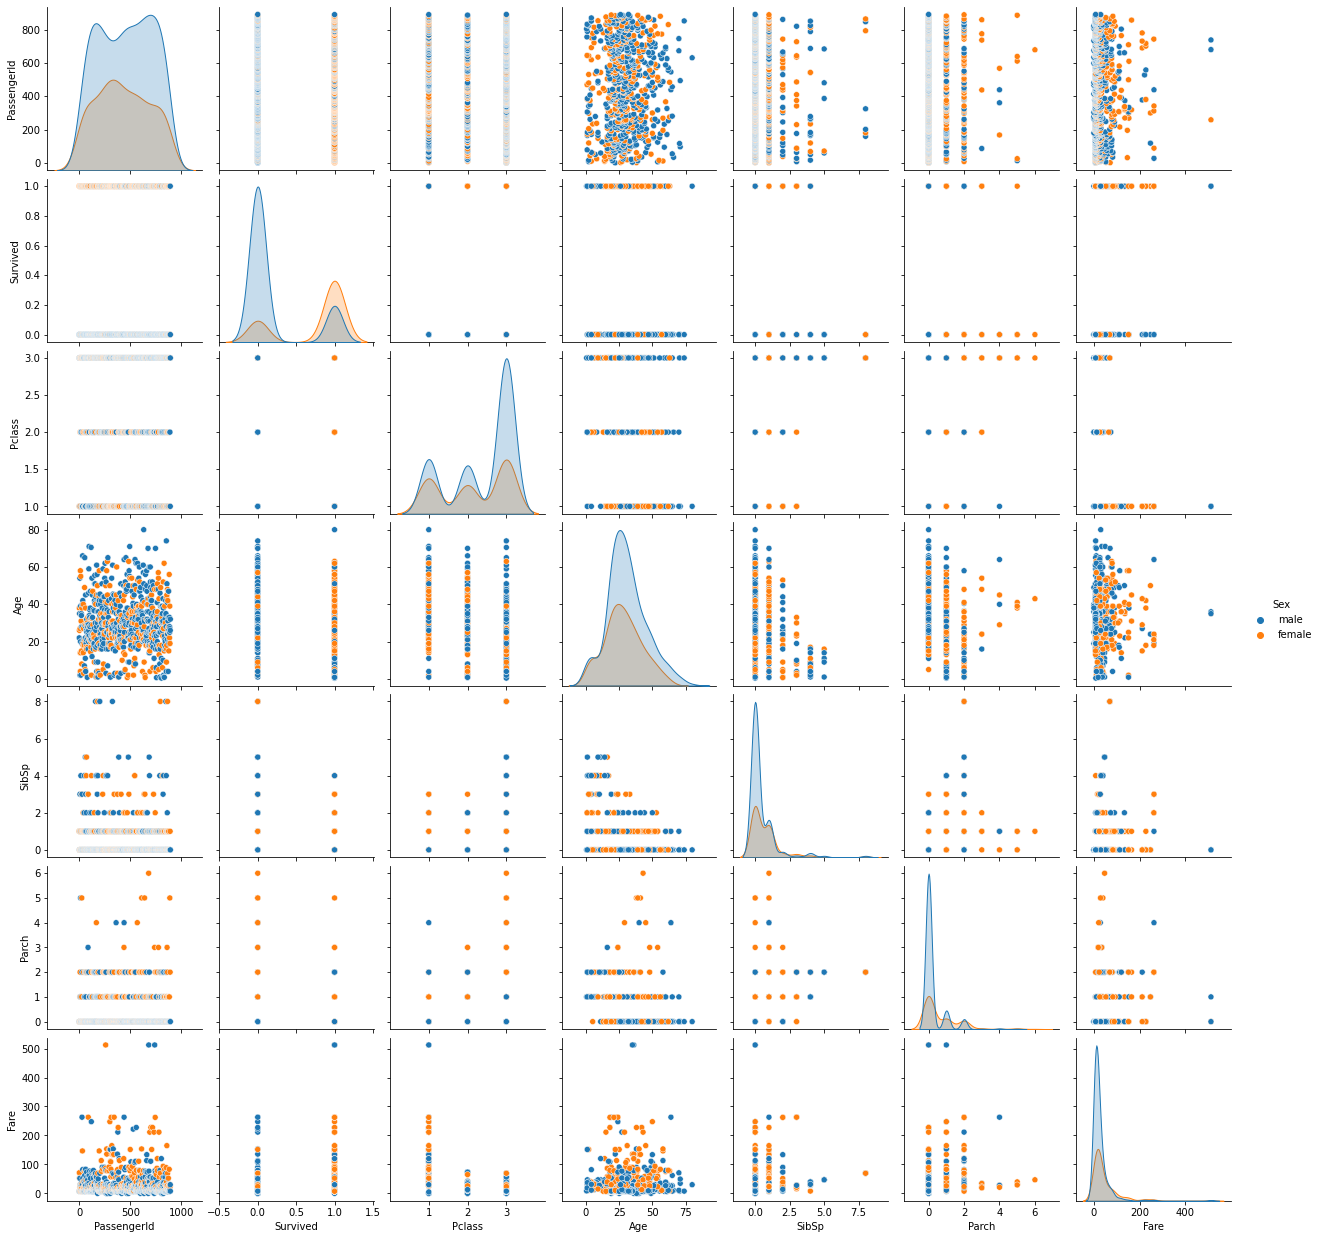

In [65]:
sns.pairplot(hue='Sex', data=df)

7. Plot a bubble plot of the ages to the fare paid by each passenger categorizing whether
they survived or not. The size of each bubble should be determined by the passenger class and the name of each individual as the hover name.

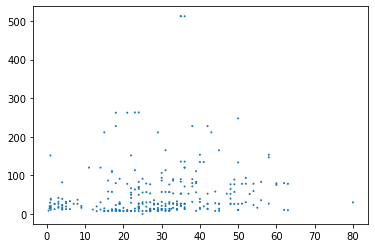

In [50]:
plt.scatter( 'Age', 'Fare', 'Survived', data=df)